### TODO
- **Clean and prep data for Ml model**
- **Find insights along the way**

#### Sprint- 1 (Data Analysis and Mining)
- Requirements 
    1. Build an interface (using streamlit) for Elon Musk where he can enter the laptop features like RAM Size, RAM Type, HDD, OS, etc. and get the price prediction.
    2. Based on your Data Analysis and MIning skills, give recommendations to Elon Musk on how the pricing works in the laptop market.


#### Sprint - 2 (ML Model Tuning)
- Now he wants you to test the models you have created for Underfitting and Overfitting. He wants you to build a best fit model.
    1. First try to check if the models you have created are a best fit or not.
    2. See if applying cross validation helps improve your models performance.

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df=pd.read_csv('laptop_details.csv')
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


### MRP Feature cleaning

In [4]:
# Removing the ₹ sign from the MRP column and converting it to a float
df['MRP']= df['MRP'].str.replace('₹','').str.replace(',','').astype(int)
df['MRP'][:5]

0    36990
1    39990
2    32990
3    49990
4    49990
Name: MRP, dtype: int32

# Feature Engineering

### Extracting Brand, Processor,RAM details,OS,Storage details from the Features column.

1) Brand

In [5]:
df['Brand'] = df['Product'].str.split().str[0] # Since First word in the Product is Brand

In [6]:
# df['Brand'].value_counts()
df['Brand'].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

2) Processor

In [7]:
regex= r'^(?:AMD|Intel|M1|Apple)[\s\w]+Processor'
df['Processor Type']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Processor Type']=df['Processor Type'].apply(lambda x : ''.join(x))
df['Processor Type']=df['Processor Type'].apply(lambda x: x.replace(" Processor", ""))

In [8]:
df[df['Processor Type']==''] # to check for empty values in processor

,Product,Rating,MRP,Feature,Brand,Processor Type
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,4.3,38990,Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...,DELL,
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,46990,Stylish & Portable Thin and Light Laptop14 inc...,realme,
29,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,46990,Stylish & Portable Thin and Light Laptop14 inc...,realme,
33,acer Aspire 7 Ryzen 5 Hexa Core AMD R5-5500U -...,4.4,47990,Free upgrade to Windows 11 when availableAMD R...,acer,
53,realme Book(Slim) Intel Evo Core i5 11th Gen -...,4.4,59990,Powered by 11th Gen Intel Evo Core i5 Processo...,realme,
54,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,47990,Free upgrade to Windows 11 when availableIntel...,acer,
69,DELL Ryzen 5 Hexa Core AMD R5-5600H - (16 GB/5...,4.6,70990,Processor: AMD Ryzen R5-5600H (3.30 GHz up to ...,DELL,
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,4.4,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,SAMSUNG,
94,DELL Inspiron Pentium Silver - (8 GB/256 GB SS...,4.2,30428,Processor: Intel PQC-N5030 (1.10 GHz up to 3.1...,DELL,
116,realme Book(Slim) Intel Evo Core i5 11th Gen -...,4.4,59990,Powered by 11th Gen Intel Evo Core i5 Processo...,realme,


In [9]:
# Could've just dropped these but decided to do this manually
df.iloc[6,5]='Intel i3-1115G4'
df.iloc[8,5]='Intel Core i3'
df.iloc[29,5]='Intel Core i3'
df.iloc[33,5]='AMD Ryzen 5 Hexa Core'
df.iloc[53,5]='Intel Evo Core i5'
df.iloc[54,5]='Intel Core i5'
df.iloc[69,5]='AMD Ryzen R5-5600H'
df.iloc[83,5]='Qualcomm Snapdragon 7c Gen 2'
df.iloc[94,5]='Intel PQC-N5030'
df.iloc[116,5]='Gen Intel Evo Core i5'
df.iloc[122,5]='AMD Ryzen 7 Octa Core'
df.iloc[142,5]='AMD Ryzen 3 Dual Core'
df.iloc[172,5]='Intel i3-1115G4'
df.iloc[232,5]='Intel Core i7'
df.iloc[249,5]='Intel i3-1125G4'
df.iloc[253,5]='AMD Ryzen 5-3450U'
df.iloc[259,5]='Intel Core i5'
df.iloc[349,5]='Intel Core i5-1135G7'
df.iloc[355,5]='Intel Core i3-1005G1'
df.iloc[393,5]='Intel Core i5'
df.iloc[438,5]='Intel Core i5'
df.iloc[443,5]='Intel Core i7'
df.iloc[502,5]='AMD Ryzen 5 Hexa Core'
df.iloc[508,5]='Intel Core i5 Pro'
df.iloc[593,5]='Intel i7-11800H'
df.iloc[622,5]='Intel Core i7'
df.iloc[628,5]='Intel Core i9'
df.iloc[643,5]='Intel Core i7'
df.iloc[644,5]='Intel Core i5'
df.iloc[645,5]='AMD Ryzen 5 Hexa Core'
df.iloc[688,5]='Intel Core i7'
df.iloc[689,5]='Intel Core i7'

In [10]:
df['Processor Type'].unique()

array(['Intel Core i3', 'AMD Ryzen 5 Hexa Core', 'Intel Core i5',
       'Intel i3-1115G4', 'AMD Ryzen 7 Quad Core',
       'AMD Ryzen 5 Quad Core', 'AMD Ryzen 9 Octa Core',
       'AMD Ryzen 7 Octa Core', 'Apple M1', 'Intel Celeron Dual Core',
       'AMD Ryzen 3 Dual Core', 'AMD Athlon Dual Core',
       'Intel Evo Core i5', 'AMD Ryzen 3 Quad Core', 'Apple M2',
       'AMD Ryzen R5-5600H', 'Intel Celeron Quad Core', 'Intel Core i7',
       'Apple M1 Pro', 'Qualcomm Snapdragon 7c Gen 2', 'Intel PQC-N5030',
       'Gen Intel Evo Core i5', 'Apple M1 Max', 'Intel Core i9',
       'Intel Pentium Silver', 'Intel i3-1125G4', 'AMD Ryzen 5-3450U',
       'AMD Ryzen 5 Dual Core', 'Intel Core i5-1135G7',
       'Intel Core i3-1005G1', 'Intel Pentium Quad Core',
       'Intel Core i5 Pro', 'AMD Dual Core', 'Intel i7-11800H',
       'AMD Ryzen 3 Hexa Core'], dtype=object)

In [11]:
# No longer any None type values
len(df[df['Processor Type']=='']) 

0

### Creating a feature for just the main processor types 

In [12]:
df['Processor Type'].replace("Gen Intel Evo Core i5","Intel Evo Core i5", inplace=True)

In [13]:
df['Processor Type']

0                Intel Core i3
1                Intel Core i3
2                Intel Core i3
3        AMD Ryzen 5 Hexa Core
4                Intel Core i5
                ...           
715    Intel Celeron Dual Core
716      AMD Ryzen 7 Octa Core
717      AMD Ryzen 9 Octa Core
718              Intel Core i7
719              Intel Core i5
Name: Processor Type, Length: 720, dtype: object

In [14]:
df[['Processor','x','y','z','a']]=df['Processor Type'].str.split(" ", expand=True)
df.drop(['Processor Type','x','y','z','a'], axis=1, inplace=True)
df['Processor'].unique()

array(['Intel', 'AMD', 'Apple', 'Qualcomm'], dtype=object)

3) Operating System

In [15]:
regex = r'[\d]+[\s]bit[\s\w]+Operating System|[\(Windows)\d\s]+Operating System|[\(Chrome|Mac OS)]+Operating System'

# Apply regex to 'Feature' column and store it in a new column called 'OS'
df['OS'] = df['Feature'].apply(lambda x : re.findall(regex, x))

# Converting the OS info from a list to a string.
df['OS'] = df['OS'].apply(lambda x : ''.join(x))

# Remove the string " Operating System" from the 'OS' column
df['OS'] = df['OS'].apply(lambda x: x.replace(" Operating System", ""))

In [16]:
df['OS'].value_counts()

64 bit Windows 11                     404
Windows 11                            156
64 bit Windows 10                     115
MMac OS                                19
Windows 10                             12
MChrome                                 6
OS                                      2
64 bit DOS                              2
32 bit Windows 11                       1
5Operating System64 bit Windows 10      1
 Windows 1064 bit Windows 10            1
64 bit Chrome                           1
Name: OS, dtype: int64

In [17]:
# Cleaning a bit
df['OS'].replace({'MMac OS':'Mac', 
                                'OS':'Mac', 
                                'MChrome':'Chrome',
                                '5Operating System64 bit Windows 10':'Windows 10',
                                ' Windows 1064 bit Windows 10':'Windows 10',
                                '64 bit Chrome':'Chrome'}, 
                                inplace=True) # inplace makes changes to the dataframe itself instead of returning a new df
df['OS']=df['OS'].apply(lambda x: x.replace('64 bit ', '').replace('32 bit ',''))

In [18]:
df['OS'].unique()

array(['Windows 11', 'Windows 10', 'Mac', 'Chrome', 'DOS'], dtype=object)

4) RAM

In [19]:
regex = r'\d+\sGB[\s\w]+RAM'
df['ram'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df.ram = df.ram.apply(lambda x: ''.join(x))

In [20]:
df['ram'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

In [21]:
# Cleaning up a bit
df['ram']=df['ram'].apply(lambda x: x.replace("128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM","8 GB DDR4 RAM"))
df['ram']=df['ram'].apply(lambda x: x.replace("Unified Memory","Unified"))
df['ram'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM', '32 GB Unified RAM',
       '16 GB LPDDR4 RAM', '32 GB DDR5 RAM', '8 GB DDR5 RAM',
       '32 GB DDR4 RAM', '32 GB LPDDR4X RAM', '16 GB LPDDR3 RAM'],
      dtype=object)

In [22]:
df[['ramSize','GB', 'ramType', 'RAM']]=df['ram'].str.split(' ', expand=True)

df.drop(['GB','RAM','ram'], axis=1, inplace=True)
df['ramSize']=df['ramSize']+"GB"
df.head()

,Product,Rating,MRP,Feature,Brand,Processor,OS,ramSize,ramType
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,8GB,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,8GB,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,8GB,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD,Windows 10,8GB,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,8GB,DDR4


5) Storage

In [23]:
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['Storage']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Storage']=df['Storage'].apply(lambda x : ''.join(x))

In [24]:
df.head()

,Product,Rating,MRP,Feature,Brand,Processor,OS,ramSize,ramType,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,8GB,DDR4,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,8GB,DDR4,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,8GB,DDR4,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD,Windows 10,8GB,DDR4,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,8GB,DDR4,512 GB SSD


In [25]:
df[df['Storage']=='']

,Product,Rating,MRP,Feature,Brand,Processor,OS,ramSize,ramType,Storage
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,4.4,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,SAMSUNG,Qualcomm,Windows 11,4GB,LPDDR4X,
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Lenovo,Intel,Chrome,4GB,DDR4,
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Lenovo,Intel,Chrome,4GB,DDR4,
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,14990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel,Chrome,4GB,LPDDR4,
509,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,24390,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel,Chrome,4GB,LPDDR4,
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.5,21990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,ASUS,Intel,Windows 11,4GB,DDR4,
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.0,19990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,ASUS,Intel,Windows 11,4GB,DDR4,
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual ...,3.6,28490,Intel Celeron Dual Core Processor4 GB LPDDR4X ...,Lenovo,Intel,Chrome,4GB,LPDDR4X,
695,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,4.1,25990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel,Chrome,4GB,LPDDR4,
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel,Chrome,4GB,LPDDR4,


In [26]:
#Again manually filling the 10 missing ones 
df.iloc[83,9]='128GB EMMC'
df.iloc[89,9]='64GB EMMC'
df.iloc[96,9]='64GB EMMC'
df.iloc[345,9]='32GB EMMC'
df.iloc[509,9]='64GB EMMC'
df.iloc[544,9]='64GB EMMC'
df.iloc[559,9]='64GB EMMC'
df.iloc[632,9]='128GB EMMC'
df.iloc[695,9]='64GB EMMC'
df.iloc[715,9]='64GB EMMC'

In [27]:
df['Storage'].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD256 GB SSD', '1 TB SSD',
       '256 GB HDD256 GB SSD', '128GB EMMC', '64GB EMMC', '1 TB HDD',
       '128 GB SSD', '32GB EMMC', '1 TB HDD512 GB SSD',
       '128 GB SSD1 TB HDD128 GB SSD', '2 TB SSD'], dtype=object)

In [28]:
# Cleaning up a bit
df['Storage'].replace({'256 GB SSD':'256GB SSD'}, inplace=True)
df['Storage'].replace({'512 GB SSD':'512GB SSD'}, inplace=True)
df['Storage'].replace({'1 TB SSD':'1TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD':'128GB SSD'}, inplace=True)
df['Storage'].replace({'2 TB SSD':'2TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD256 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'256 GB HDD256 GB SSD':'256GB HDD'}, inplace=True)
df['Storage'].replace({'1 TB HDD512 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD1 TB HDD128 GB SSD':'1TB HDD'}, inplace=True)

#### Now we can split this to create 2 features for size and type of storage

In [29]:
df[['diskSize','diskType']]=df['Storage'].str.split(' ', expand=True)

df.drop(['Storage'], axis=1, inplace=True)
df.head()

,Product,Rating,MRP,Feature,Brand,Processor,OS,ramSize,ramType,diskSize,diskType
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,8GB,DDR4,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,8GB,DDR4,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,8GB,DDR4,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD,Windows 10,8GB,DDR4,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,8GB,DDR4,512GB,SSD


In [30]:
df['diskSize'].value_counts()

512GB    375
1TB      223
256GB     99
128GB      8
64GB       7
2TB        7
32GB       1
Name: diskSize, dtype: int64

# Final Data

In [31]:
df.head()

,Product,Rating,MRP,Feature,Brand,Processor,OS,ramSize,ramType,diskSize,diskType
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,8GB,DDR4,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,8GB,DDR4,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,8GB,DDR4,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD,Windows 10,8GB,DDR4,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,8GB,DDR4,512GB,SSD


### Exploratory Data Analysis

In [32]:
df.isna().sum()

Product        0
Rating       139
MRP            0
Feature        0
Brand          0
Processor      0
OS             0
ramSize        0
ramType        0
diskSize       0
diskType       0
dtype: int64

### Analysis of MRP column

In [33]:
# MRP Column Analysis
summary = df['MRP'].agg(['mean',
                          'min',
                          'max',
                          lambda x: [x.quantile(0.25),x.quantile(0.50), x.quantile(0.75)], 
                          'std'])

print(summary)

mean                          81605.8375
min                                14990
max                               434830
<lambda>    [38996.75, 59990.0, 95240.0]
std                         61552.955102
Name: MRP, dtype: object


This suggests data may have outliers

<Axes: ylabel='Frequency'>

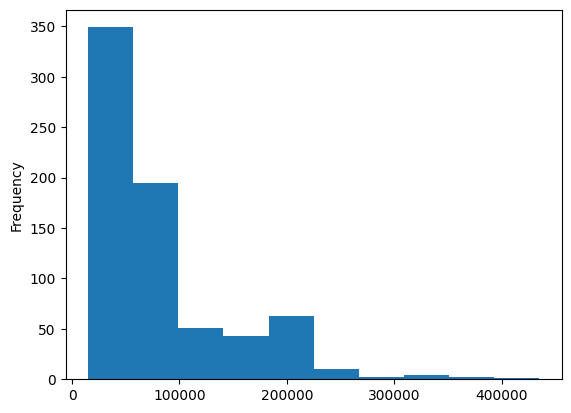

In [34]:
# Distribution
df['MRP'].plot(kind='hist')

<Axes: >

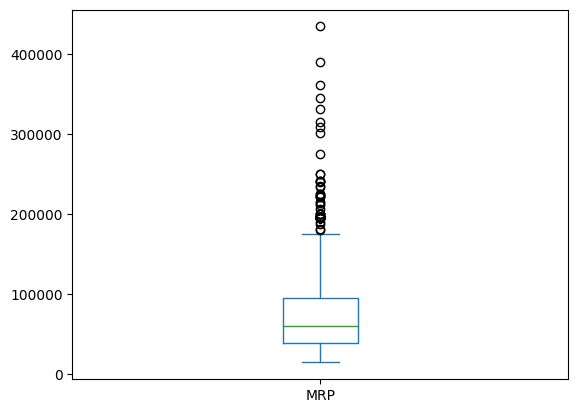

In [35]:
# BoxPlot to check for outliers
df['MRP'].plot(kind='box')

**There are some laptop prices which are far away from group of data, Each data point is important so we will take transformation of this column.**

### Relation between Brand and MRP

In [36]:
# Let's check the relation between brand and price 
df.groupby(['Brand'])['MRP'].agg(['min', 'max', 'mean'])

,min,max,mean
Brand,,,
ALIENWARE,199990,345390,253390.000000
APPLE,88990,309490,162332.105263
ASUS,14990,361990,115667.589641
DELL,30428,434830,73660.688525
GIGABYTE,73990,73990,73990.000000
HP,25990,199990,65195.557377
Infinix,20990,52990,36890.000000
Lenovo,19490,157990,45454.709184
MSI,43990,389990,121963.966667


**Price for laptop brand ALIENWARE really high between 2 Lakh to 3.5 Lakh, these laptops cost the most.**

In [37]:
# Let's check the relation between OS and price 
df.groupby(['OS'])['MRP'].agg(['min', 'max', 'mean'])

,min,max,mean
OS,,,
Chrome,14990,28490,22332.857143
DOS,35990,69990,52990.000000
Mac,15990,309490,148561.428571
Windows 10,25950,345390,76357.356589
Windows 11,19990,434830,81147.957219


In [38]:
# Let's check the relation between Processors and price 
df.groupby(['Processor'])['MRP'].agg(['min', 'max', 'mean'])

,min,max,mean
Processor,,,
AMD,24990,361990,96619.929032
Apple,88990,309490,162332.105263
Intel,14990,434830,65863.397436
Qualcomm,32990,32990,32990.000000


**Apple has the highest avg price.**

In [39]:
# What about RAM TYPE
df.groupby(['ramType'])['MRP'].agg(['min', 'max', 'mean'])

,min,max,mean
ramType,,,
DDR4,19490,434830,63040.636364
DDR5,76590,389990,188289.858696
LPDDR3,233990,233990,233990.000000
LPDDR4,14990,71990,27040.000000
LPDDR4X,20990,224990,58328.081081
LPDDR5,89990,174990,125878.888889
Unified,121990,309490,193865.000000


In [40]:
# Disk TYpe
df.groupby(['diskType'])['MRP'].agg(['min', 'max', 'mean'])

,min,max,mean
diskType,,,
EMMC,14990,32990,23130.000000
HDD,19490,129999,58303.666667
SSD,15990,434830,84178.741692


**SSDs have highest avg price.**

In [41]:
# RamSize
df.groupby(['ramSize'])['MRP'].agg(['min', 'max', 'mean'])

,min,max,mean
ramSize,,,
16GB,37990,241990,125825.577947
32GB,199990,434830,288974.705882
4GB,14990,61249,29448.027027
8GB,22990,149990,48788.905707


**Price is directly propotional to the ramSize as we can see above 32 GB RAM laptops cost more.**

In [42]:
#Disk SIze
df.groupby(['diskSize'])['MRP'].agg(['min', 'max', 'mean'])

,min,max,mean
diskSize,,,
128GB,15990,32990,24925.000000
1TB,27490,434830,136098.340807
256GB,19490,121990,38732.282828
2TB,233990,389990,304704.285714
32GB,14990,14990,14990.000000
512GB,29390,222990,58852.338667
64GB,19490,25990,22118.571429


**More Storage = Greater Price.**

## Now to extract this data to a csv which can be used to build a ML model

In [43]:
data=df[['Brand','Processor','OS','ramType','ramSize','diskType','diskSize','MRP']]
data.to_csv('laptop_price.csv', index=False)
data.head()

,Brand,Processor,OS,ramType,ramSize,diskType,diskSize,MRP
0,Lenovo,Intel,Windows 11,DDR4,8GB,SSD,256GB,36990
1,Lenovo,Intel,Windows 11,DDR4,8GB,SSD,512GB,39990
2,ASUS,Intel,Windows 11,DDR4,8GB,SSD,512GB,32990
3,HP,AMD,Windows 10,DDR4,8GB,SSD,512GB,49990
4,ASUS,Intel,Windows 11,DDR4,8GB,SSD,512GB,49990


#### Summay of relationship between Laptop features and Laptop Price and How the Laptop Pricing works in market.
1) The price range for laptops under the brand name ALIENWARE is approximately between 2 to 3.5 Lakh, which makes them the most expensive laptops in the market.
2) Laptops with the MAC OS have a higher average price.
3) The average price for laptops under the brands ALIENWARE, APPLE, ASUS, and MSI is high compared to rest.
4) Laptops with SSD disk type have the highest average price.
5) Apple processors have higher price compared to other processors.
6) Laptops with a 2TB disc size have a higher average price.
7) Laptops with LPDDR3 RAM type have the highest average price.
8) The price range for laptops under the brand name ALIENWARE is approximately between 2 to 3.5 Lakh, which makes them the most expensive laptops in the market.
9) The higher the disc size, the higher the price of the laptop.
10) More Ram size also ups the price of the laptop.